# ML-QuIC Demonstration Notebook

This notebook runs through the process for training and testing the models evaluated in the AI-QuIC study.

## Universal Import of Data and Packages

In [1]:
### Import Packages
import importlib as imp
import ML_QuIC as ML_QuIC
imp.reload(ML_QuIC)
import copy
import numpy as np
import tensorflow as tf

In [2]:
### Import Data and Create Objects to Analyze
DATA_DIR = '../Data/BigAnalysis'
RANDOM_SEED = 7

# Load dataAC
ml_quic = ML_QuIC.ML_QuIC()
ml_quic.import_dataset(data_dir=DATA_DIR);
ml_quic.get_dataset_statistics()

Loading Data from ../Data/BigAnalysis
---- Dataset Label Distribution ----
Negative Samples: 7067
False Positive Samples: 264
Positive Samples: 1177

---- Well Content Distribution: ----
Data Wells: 7524
Control Wells: 984


[7067, 264, 1177, 984, 7524]

## Unsupervised
### KMeans

In [3]:
### Add 2 KMeans Models
from Models import KMeansModel
ml_quic.add_model(KMeansModel.KMeansModel(n_clusters = 2,
                                          file_path= '../SavedModels/Raw/', model_name='kmeans'
                                          ), model_name='KMeans Raw', data_type='raw', tag='Unsupervised')
from Models import KMeansModel
ml_quic.add_model(KMeansModel.KMeansModel(n_clusters = 2,
                                          file_path= '../SavedModels/Analysis/', model_name='kmeans'
                                          ), model_name='KMeans Analysis', data_type='analysis', tag='Unsupervised')

### Spectral Clustering

In [4]:
### Add Spectral Clustering
from Models import SpectralClustering
ml_quic.add_model(SpectralClustering.SpectralClustering(n_clusters = 3), model_name='Spectral Raw', data_type='raw', tag='Unsupervised')

from Models import SpectralClustering
ml_quic.add_model(SpectralClustering.SpectralClustering(n_clusters = 3), model_name='Spectral Analysis', data_type='analysis', tag='Unsupervised')

## Supervised Models

### SVM

In [5]:
### SVM
from Models import SVM
ml_quic.add_model(SVM.SVM(
    file_path='../SavedModels/Raw/', model_name='svm_raw'
    ), model_name = 'SVM Raw', data_type = 'raw', tag = 'Supervised')

ml_quic.add_model(SVM.SVM(file_path='../SavedModels/Analysis/', model_name='svm_metrics'), model_name = 'SVM Analysis', data_type = 'analysis', tag = 'Supervised')

### MLP

In [6]:
### MLP
from Models import MLP
ml_quic.add_model(MLP.MLP(NDIM = ml_quic.get_num_timesteps_raw(), 
                          file_path='../SavedModels/Raw/', model_name='mlp'
                          ), model_name = 'MLP Raw', data_type = 'raw', tag='Supervised')

## Training and Evaluation

### Training

In [7]:
### Train Unsupervised Models
ml_quic.separate_train_test(tags=['Unsupervised'], train_type=3)
ml_quic.train_models(tags=['Unsupervised'])

### Train Supervised Models
ml_quic.separate_train_test(tags=['Supervised'], train_type=0)
ml_quic.train_models(tags = ['Supervised'])

### Unsupervised Evaluation

KMeans Raw:
              precision    recall  f1-score   support

         neg       0.08      0.00      0.00      7331
         pos       0.12      0.88      0.22      1177

    accuracy                           0.12      8508
   macro avg       0.10      0.44      0.11      8508
weighted avg       0.09      0.12      0.03      8508

KMeans Analysis:
              precision    recall  f1-score   support

         neg       1.00      0.96      0.98      7331
         pos       0.82      1.00      0.90      1177

    accuracy                           0.97      8508
   macro avg       0.91      0.98      0.94      8508
weighted avg       0.97      0.97      0.97      8508



c:\Users\kyleh\anaconda3\envs\tf-keras-gpu\lib\site-packages\sklearn\manifold\_spectral_embedding.py:259: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


Spectral Raw:
              precision    recall  f1-score   support

         neg       1.00      0.83      0.90      7331
         pos       0.48      0.98      0.64      1177

    accuracy                           0.85      8508
   macro avg       0.74      0.91      0.77      8508
weighted avg       0.92      0.85      0.87      8508



c:\Users\kyleh\anaconda3\envs\tf-keras-gpu\lib\site-packages\sklearn\manifold\_spectral_embedding.py:259: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


Spectral Analysis:
              precision    recall  f1-score   support

         neg       0.96      0.75      0.84      7331
         pos       0.33      0.79      0.47      1177

    accuracy                           0.75      8508
   macro avg       0.65      0.77      0.65      8508
weighted avg       0.87      0.75      0.79      8508

-------- Results on False Positives for KMeans Raw --------
Accuracy on False Positives: 0.04924242424242424
False Positives Account for 3.36% of total misclassifications.
Misclassified FP Characteristics:
Average Time to Threshold: 36.083944223107565
Average RAF: 0.03051225180876494
Average MPR: 7.615356060625499
Average MS: 546.5119521912351
Correctly Classified FP Characteristics:
Average Time to Threshold: 11.192307692307692
Average RAF: 0.10257089423076923
Average MPR: 22.043940831538464
Average MS: 2608.5


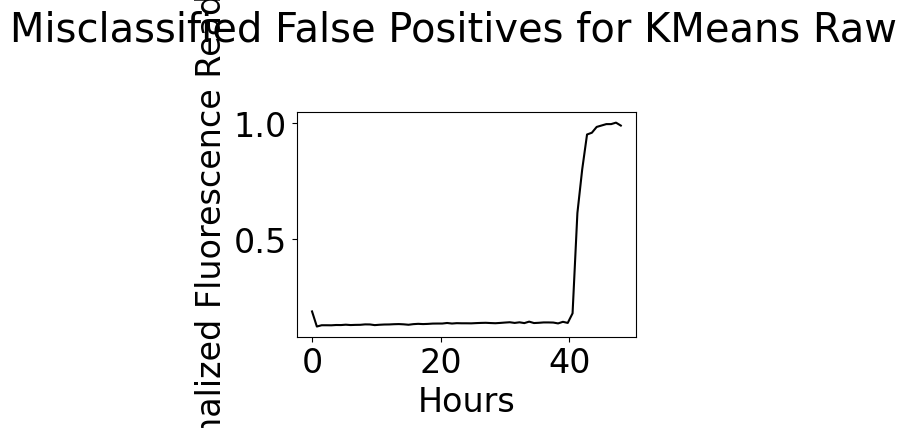

-------- Results on False Positives for KMeans Analysis --------
Accuracy on False Positives: 0.0
False Positives Account for 100.00% of total misclassifications.
Misclassified FP Characteristics:
Average Time to Threshold: 34.8582196969697
Average RAF: 0.03406059404924243
Average MPR: 8.325854553132576
Average MS: 648.0492424242424
Correctly Classified FP Characteristics:
Average Time to Threshold: nan
Average RAF: nan
Average MPR: nan
Average MS: nan


c:\Users\kyleh\anaconda3\envs\tf-keras-gpu\lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\kyleh\anaconda3\envs\tf-keras-gpu\lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


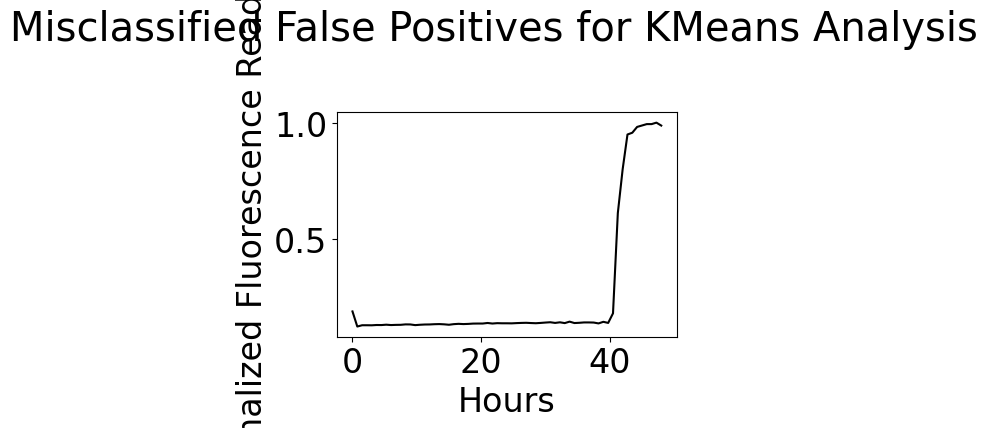

-------- Results on False Positives for Spectral Raw --------
Accuracy on False Positives: 0.13636363636363635
False Positives Account for 17.70% of total misclassifications.
Misclassified FP Characteristics:
Average Time to Threshold: 33.65491228070175
Average RAF: 0.03520319316666667
Average MPR: 9.059469673004386
Average MS: 719.108552631579
Correctly Classified FP Characteristics:
Average Time to Threshold: 42.479166666666664
Average RAF: 0.026824132972222223
Average MPR: 3.679625460611111
Average MS: 198.00694444444446


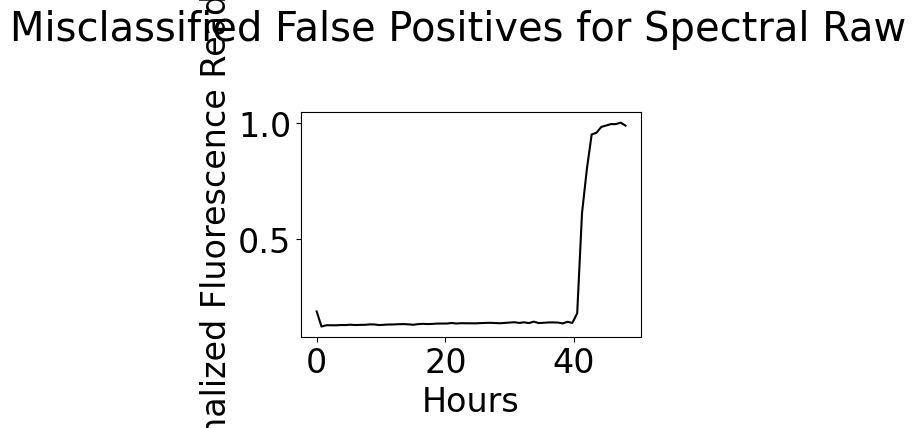

-------- Results on False Positives for Spectral Analysis --------
Accuracy on False Positives: 0.36742424242424243
False Positives Account for 7.95% of total misclassifications.
Misclassified FP Characteristics:
Average Time to Threshold: 34.152155688622756
Average RAF: 0.035392617137724555
Average MPR: 10.76390077512575
Average MS: 934.6017964071856
Correctly Classified FP Characteristics:
Average Time to Threshold: 36.07381443298969
Average RAF: 0.03176731718556701
Average MPR: 4.128393531762886
Average MS: 154.70618556701032


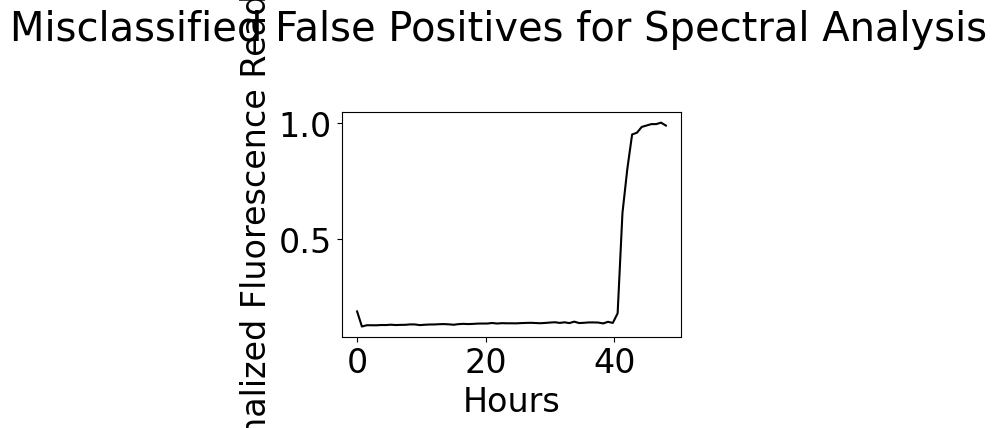

-------- Positive Characteristics for Reference --------
Time To Threshold:
	Min: 4.5, Average: 23.57521665250637, Max: 48.0
RAF:
	Min: 0.020833333, Average: 0.04972645196686491, Max: 0.222222222
MPR:
	Min: 1.241918665, Average: 10.874698049903143, Max: 54.12040816
MS:
	Min: 48.75, Average: 849.0369583687341, Max: 5967.75


e:\High Speed Code Storage\RTQuicCode\CurrentVersion2024\ML_QuIC.py:838: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  cm_fig.tight_layout(pad = 2)
e:\High Speed Code Storage\RTQuicCode\CurrentVersion2024\ML_QuIC.py:885: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  fig.tight_layout(pad = 2)


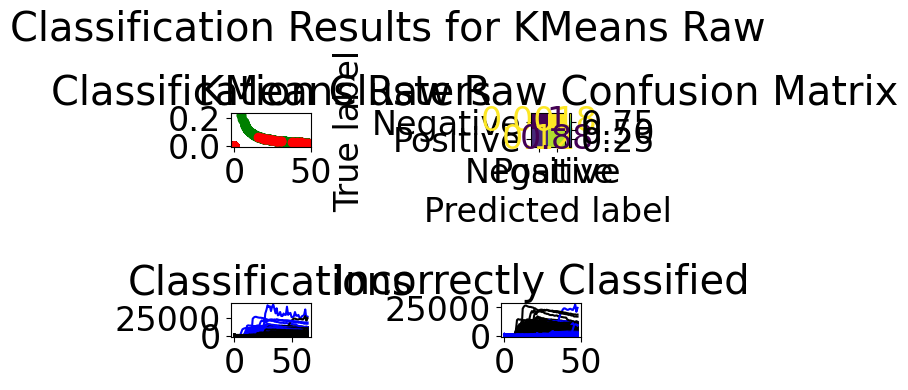

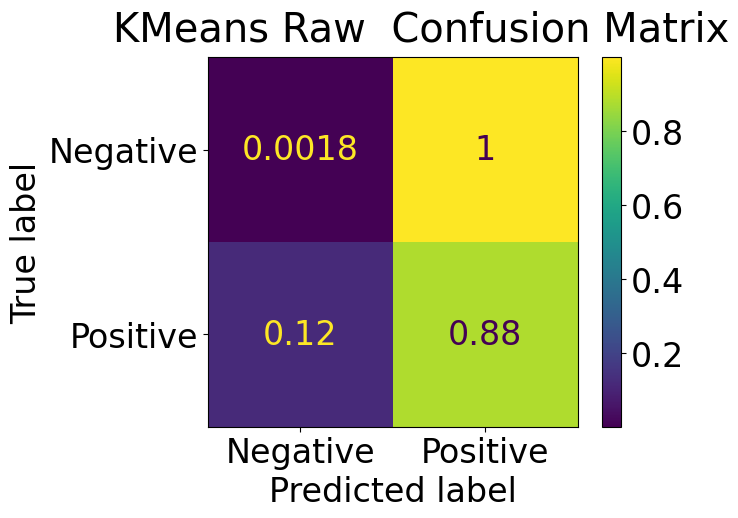

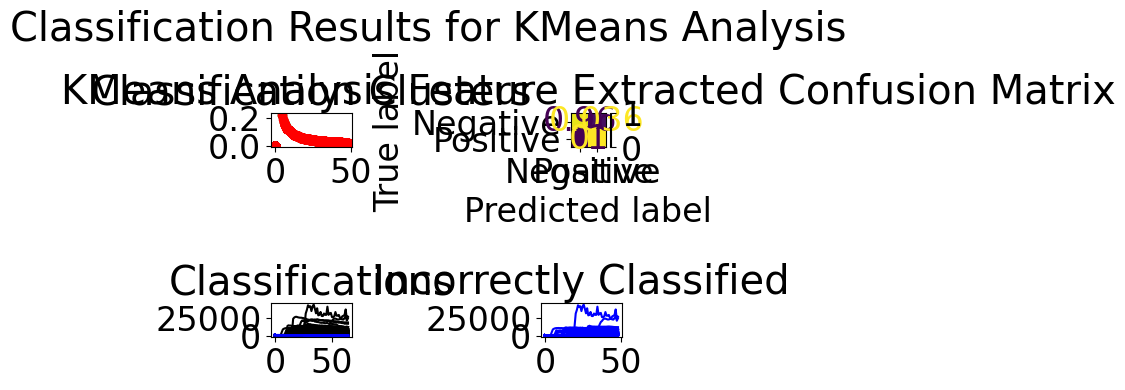

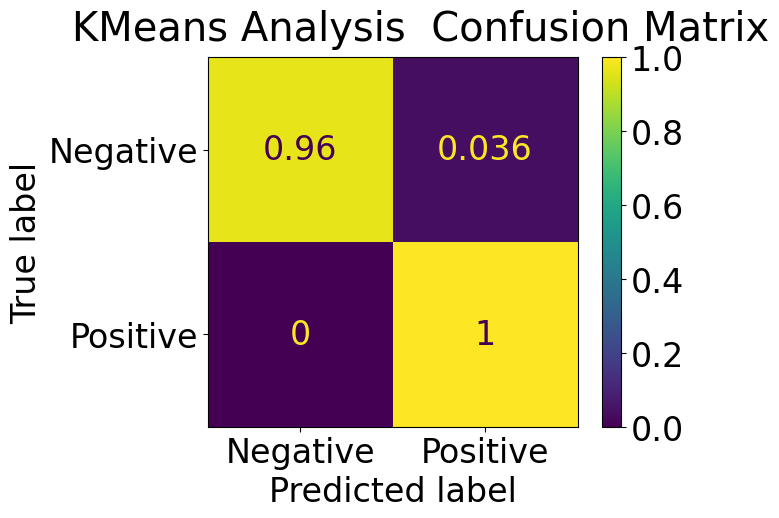

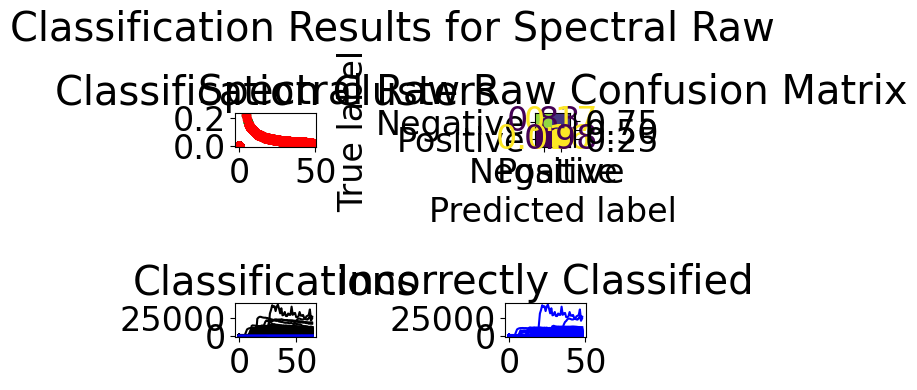

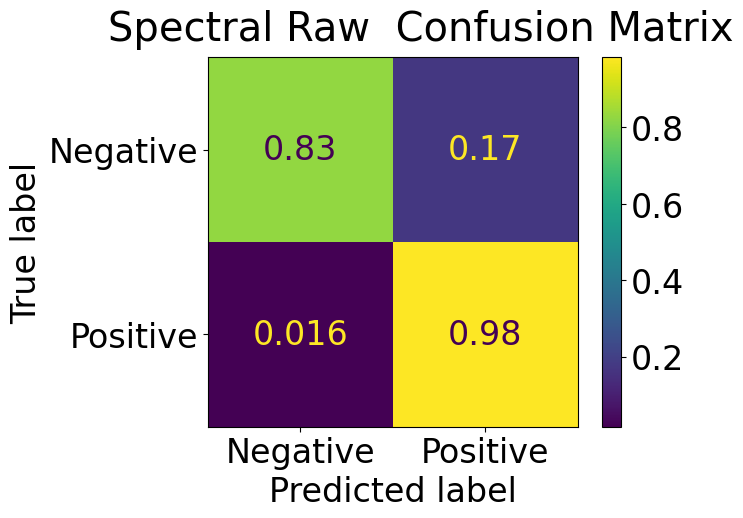

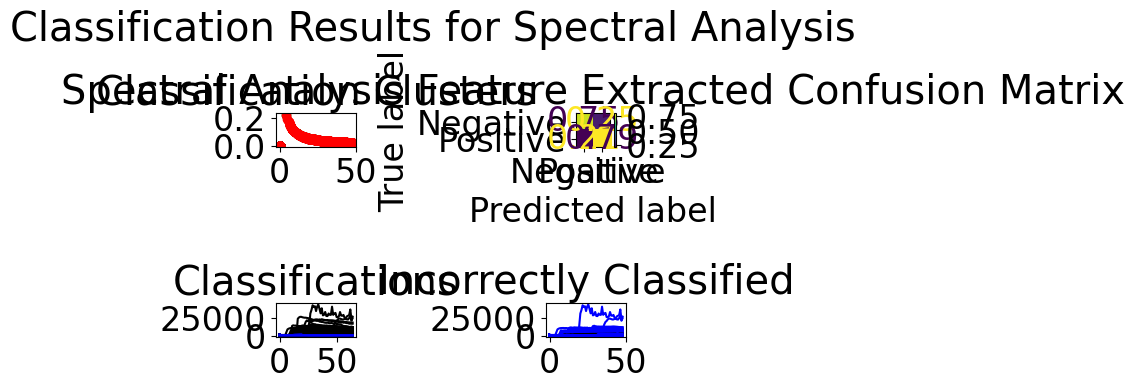

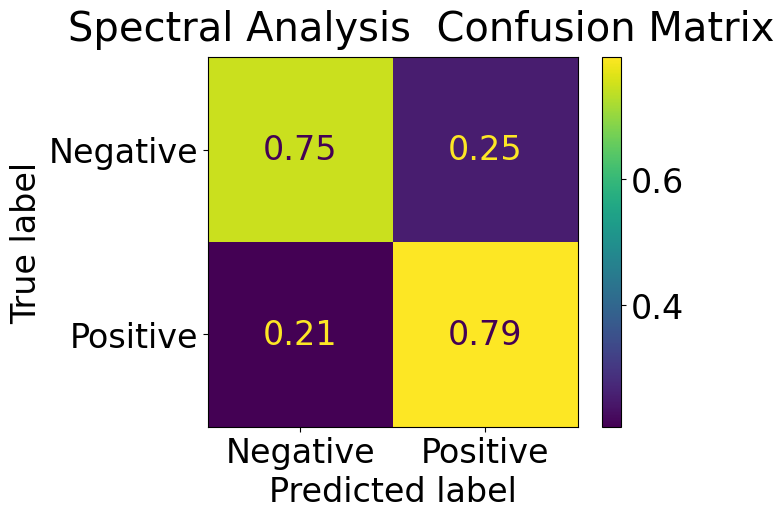

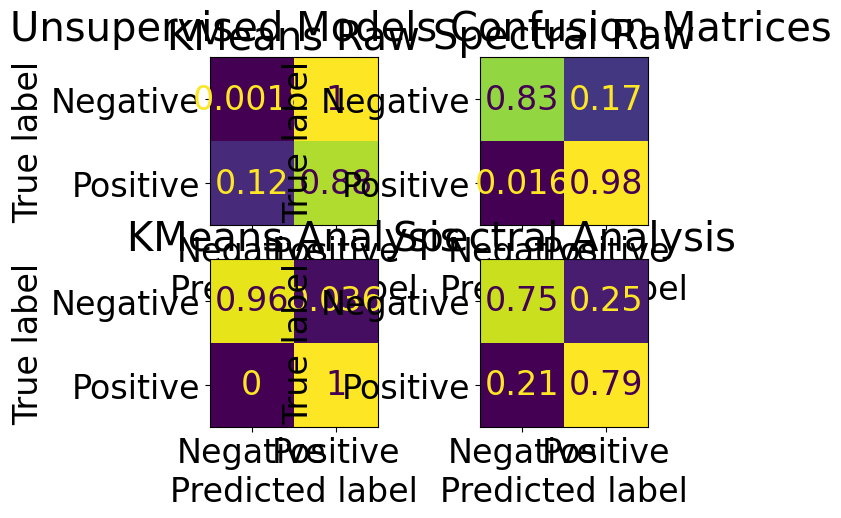

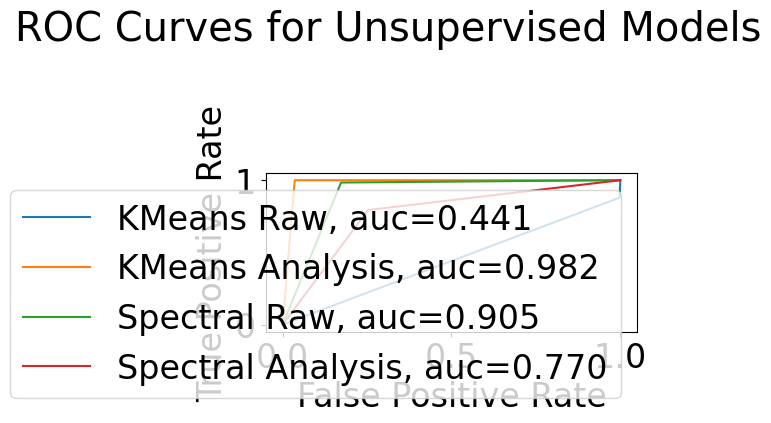

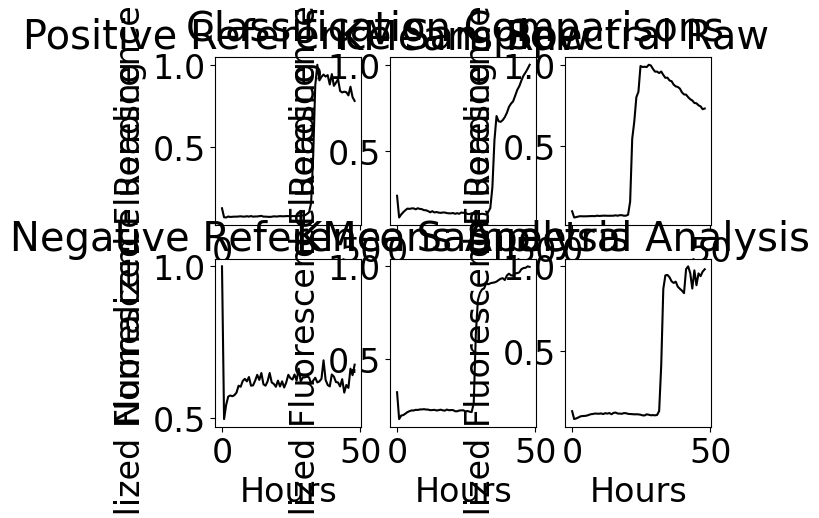

In [8]:
### Get Plots and Scores
ml_quic.get_model_scores(tags=['Unsupervised'])
ml_quic.evaluate_fp_performance(tags=['Unsupervised'])
ml_quic.get_model_plots(tags=['Unsupervised'])
ml_quic.get_group_plots_unsupervised(tags = ['Unsupervised'])

### Supervised Evaluation

SVM Raw:
              precision    recall  f1-score   support

         neg       0.99      0.98      0.98       726
         pos       0.87      0.92      0.89       124

    accuracy                           0.97       850
   macro avg       0.93      0.95      0.94       850
weighted avg       0.97      0.97      0.97       850

SVM Analysis:
              precision    recall  f1-score   support

         neg       1.00      0.97      0.98       726
         pos       0.85      0.99      0.91       124

    accuracy                           0.97       850
   macro avg       0.92      0.98      0.95       850
weighted avg       0.98      0.97      0.97       850

27/27 [==============================] - 3s 2ms/step
MLP Raw:
              precision    recall  f1-score   support

         neg       1.00      0.97      0.98       726
         pos       0.85      1.00      0.92       124

    accuracy                           0.97       850
   macro avg       0.92      0.98      0.95

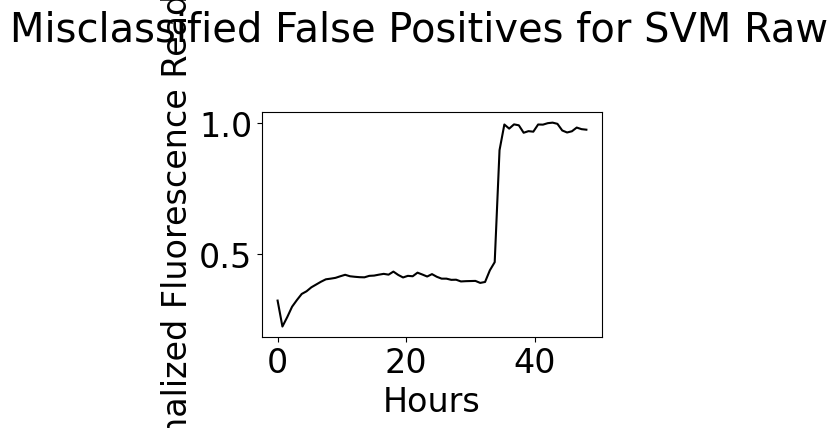

-------- Results on False Positives for SVM Analysis --------
Accuracy on False Positives: 0.12
False Positives Account for 95.65% of total misclassifications.
Misclassified FP Characteristics:
Average Time to Threshold: 33.68181818181818
Average RAF: 0.040839360545454555
Average MPR: 10.30102438868182
Average MS: 982.6590909090909
Correctly Classified FP Characteristics:
Average Time to Threshold: 43.25
Average RAF: 0.02314118633333333
Average MPR: 15.167879041666666
Average MS: 775.1666666666666


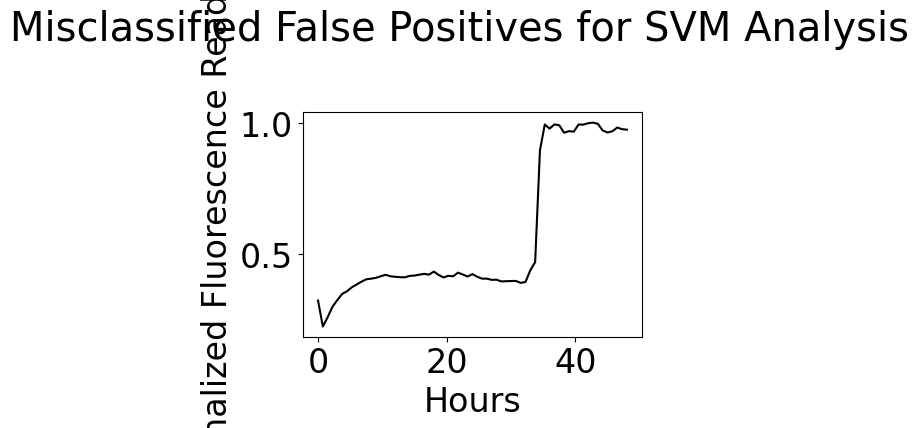

-------- Results on False Positives for MLP Raw --------
27/27 [==============================] - 0s 2ms/step
Accuracy on False Positives: 0.16
False Positives Account for 95.45% of total misclassifications.
Misclassified FP Characteristics:
Average Time to Threshold: 37.785714285714285
Average RAF: 0.027993848380952382
Average MPR: 11.488259683333334
Average MS: 1004.952380952381
Correctly Classified FP Characteristics:
Average Time to Threshold: 19.3125
Average RAF: 0.09500466875
Average MPR: 7.7181800815
Average MS: 710.0


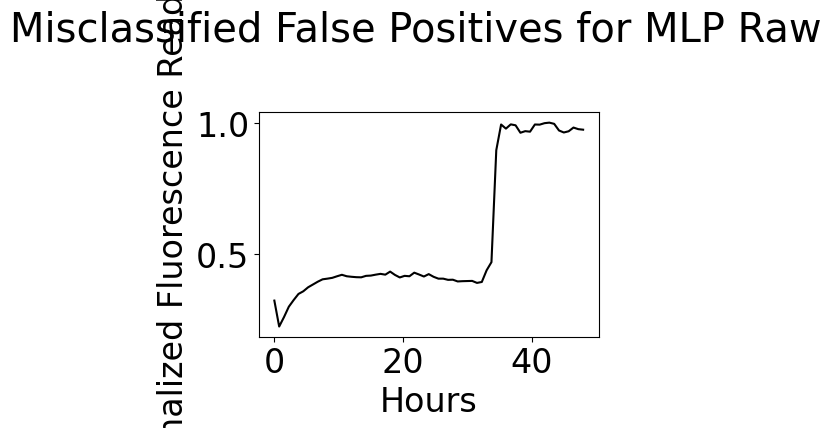

-------- Positive Characteristics for Reference --------
Time To Threshold:
	Min: 4.5, Average: 23.57521665250637, Max: 48.0
RAF:
	Min: 0.020833333, Average: 0.04972645196686491, Max: 0.222222222
MPR:
	Min: 1.241918665, Average: 10.874698049903143, Max: 54.12040816
MS:
	Min: 48.75, Average: 849.0369583687341, Max: 5967.75
27/27 [==============================] - 0s 2ms/step


e:\High Speed Code Storage\RTQuicCode\CurrentVersion2024\ML_QuIC.py:1000: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  fig.tight_layout(pad = 2)


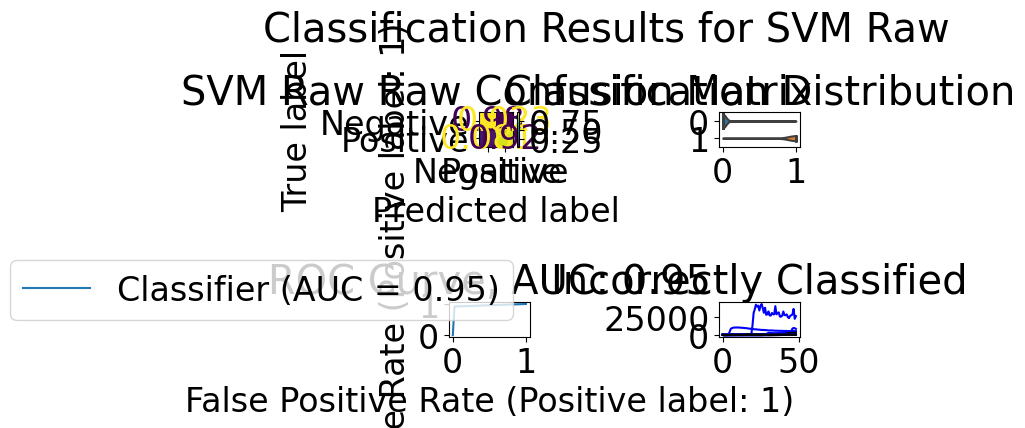

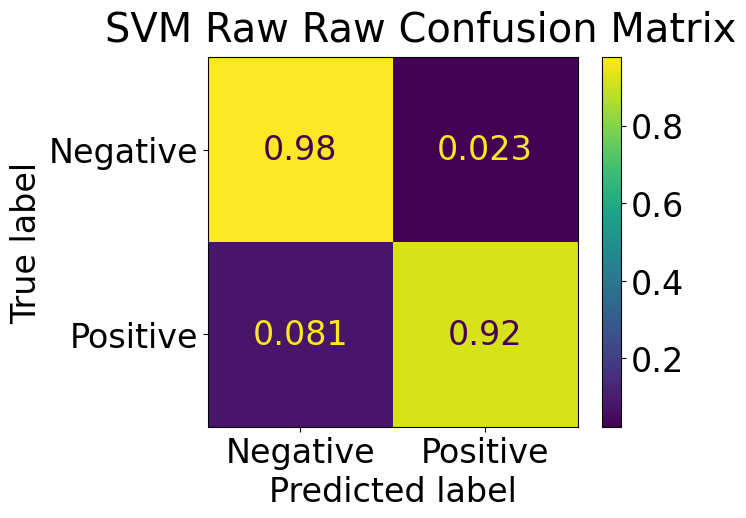

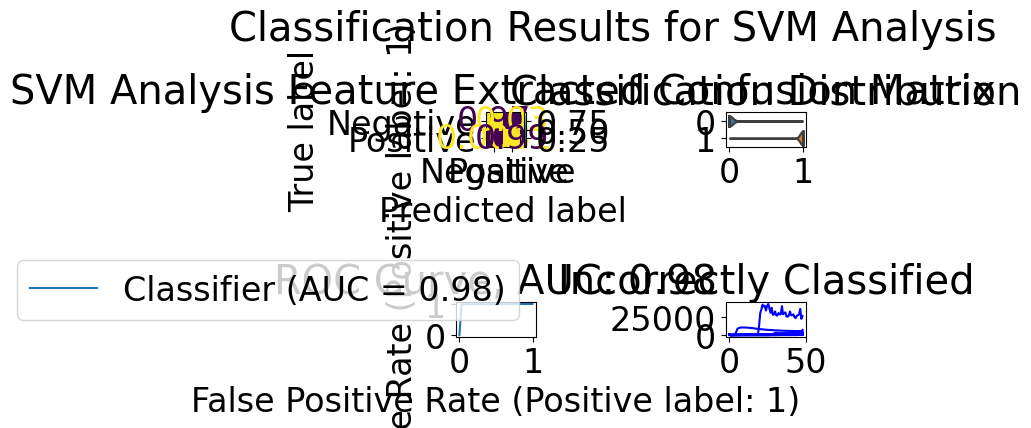

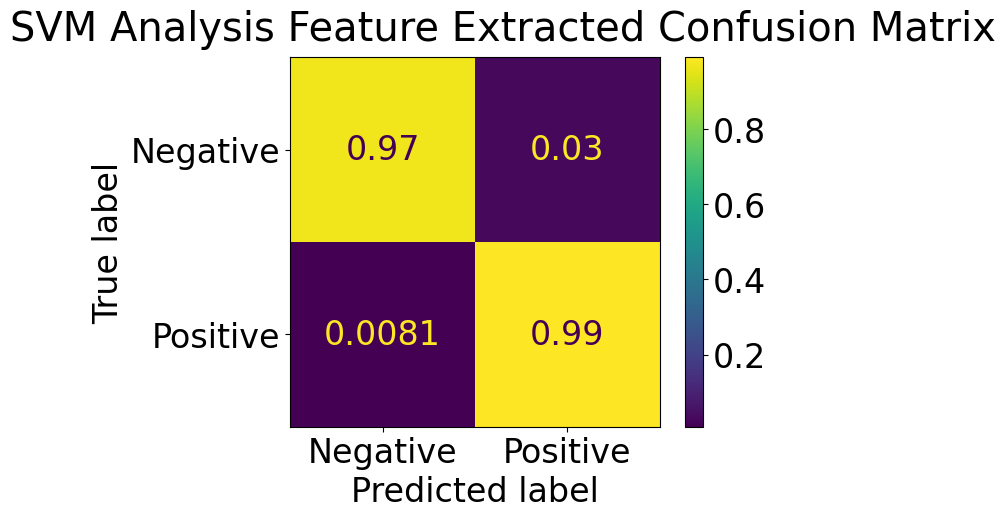

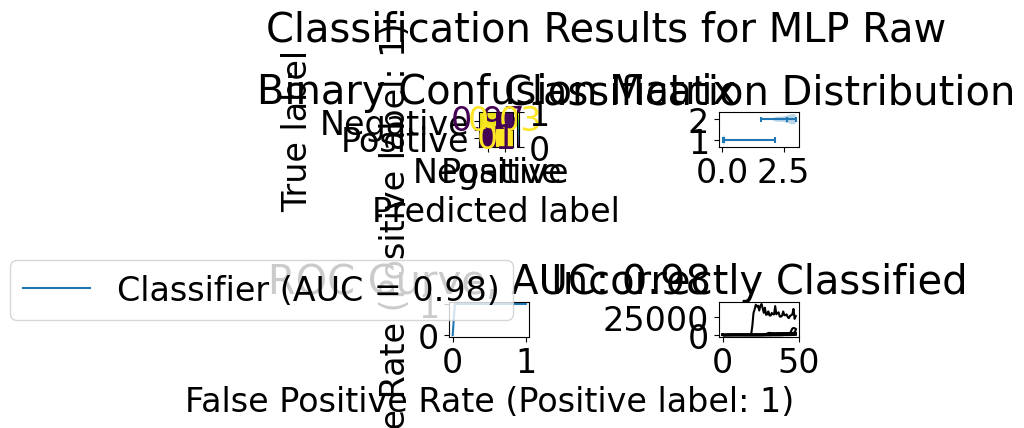

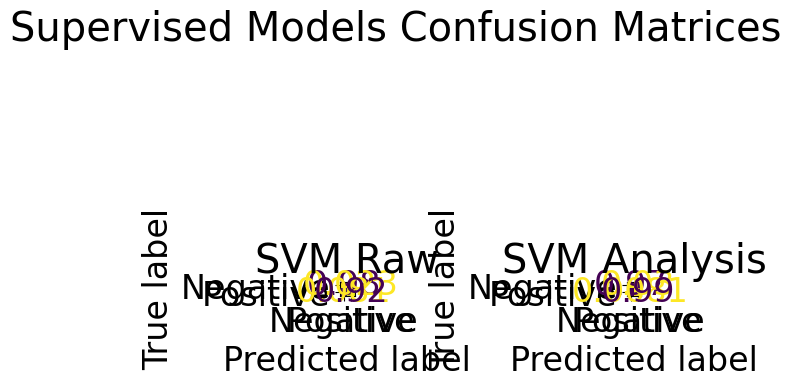

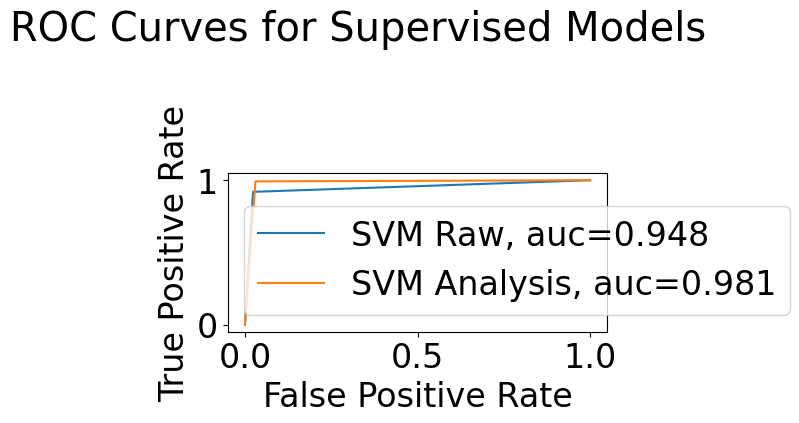

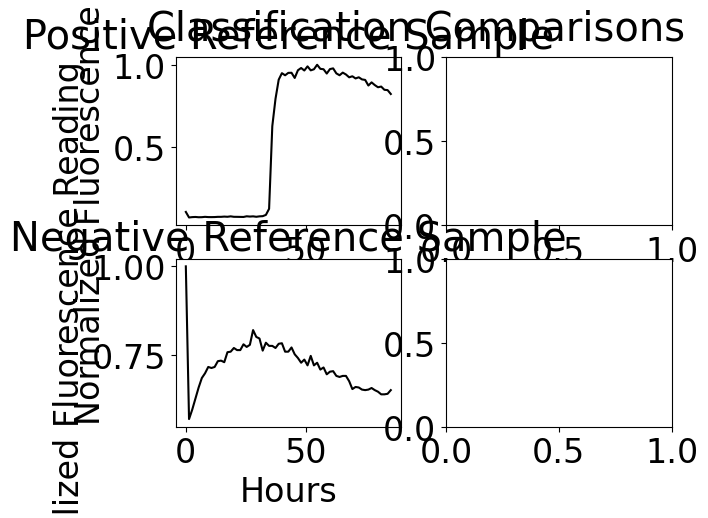

In [9]:
### Get Supervised Scores and Plots
ml_quic.get_model_scores(tags = ['Supervised'])
ml_quic.evaluate_fp_performance(tags=['Supervised'])
ml_quic.get_model_plots(tags=['Supervised'])
ml_quic.get_group_plots_supervised(tags = ['Supervised'])

### G-Well Evaluation

Loading Data from ../Data/BigAnalysisGWells
---- Dataset Label Distribution ----
Negative Samples: 208
False Positive Samples: 0
Positive Samples: 96

---- Well Content Distribution: ----
Data Wells: 304
Control Wells: 0
SVM Raw:
              precision    recall  f1-score   support

         neg       0.86      1.00      0.92       208
         pos       1.00      0.64      0.78        96

    accuracy                           0.88       304
   macro avg       0.93      0.82      0.85       304
weighted avg       0.90      0.88      0.88       304

SVM Analysis:
              precision    recall  f1-score   support

         neg       0.93      1.00      0.97       208
         pos       1.00      0.84      0.92        96

    accuracy                           0.95       304
   macro avg       0.97      0.92      0.94       304
weighted avg       0.95      0.95      0.95       304

10/10 [==============================] - 0s 3ms/step
MLP Raw:
              precision    recall  f1-sc

e:\High Speed Code Storage\RTQuicCode\CurrentVersion2024\ML_QuIC.py:1000: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  fig.tight_layout(pad = 2)


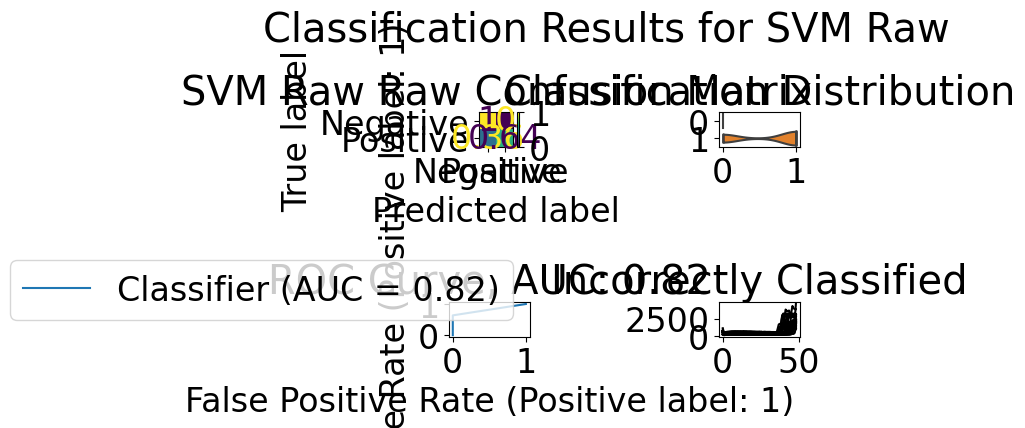

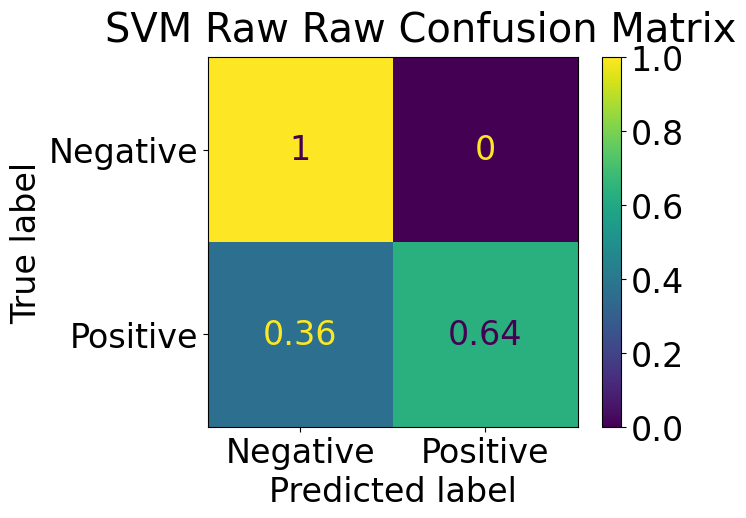

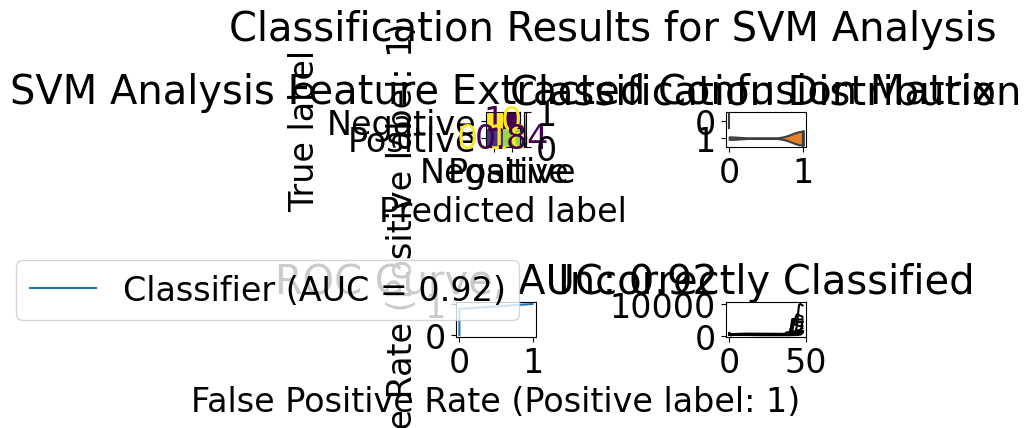

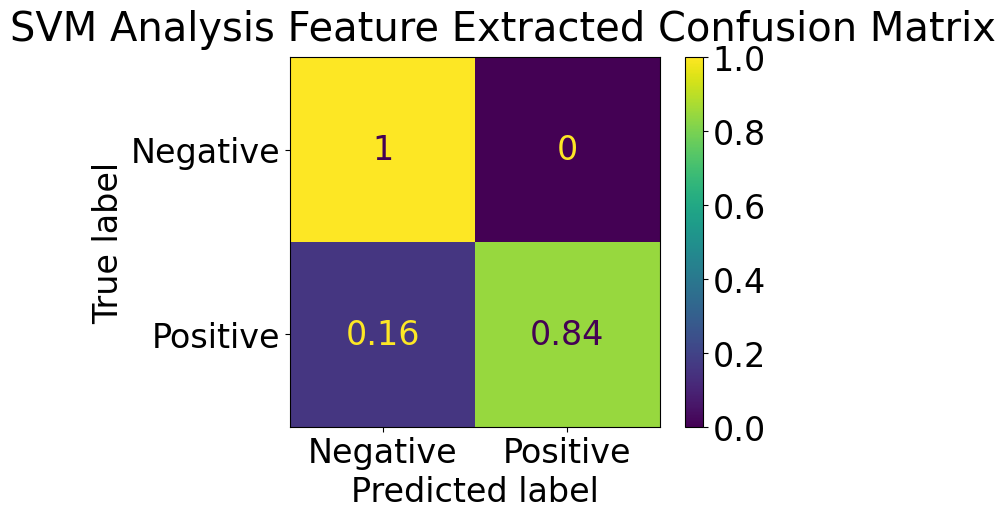

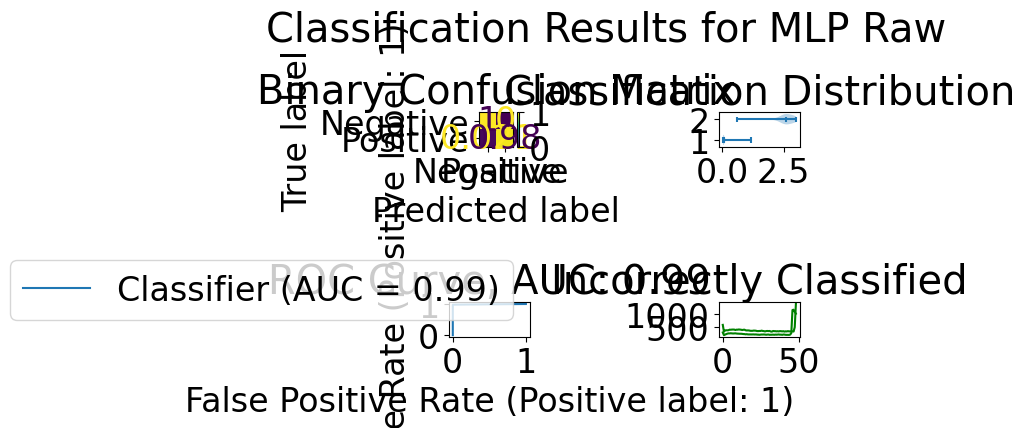

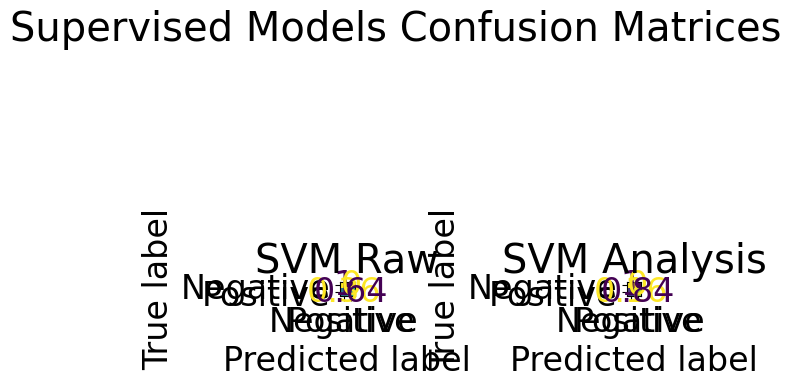

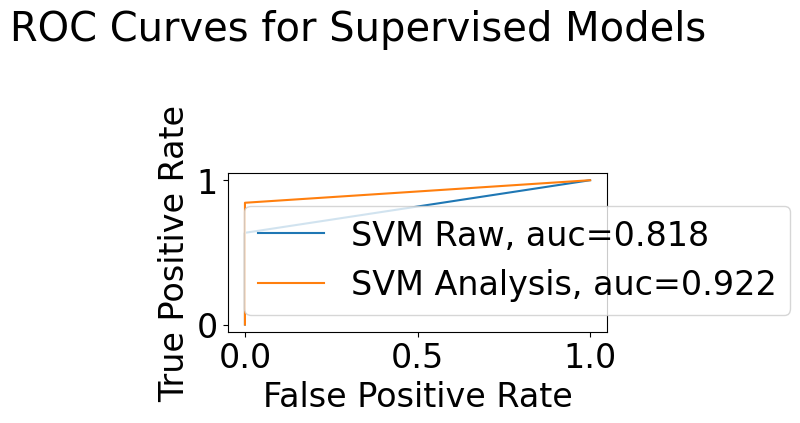

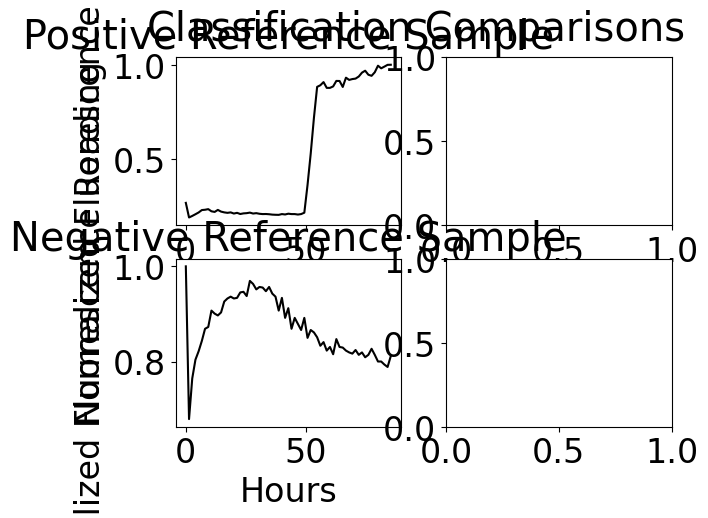

In [10]:
### Test on G Wells
ml_quic = ml_quic = ML_QuIC.ML_QuIC()
ml_quic.import_dataset(data_dir='../Data/BigAnalysisGWells');
ml_quic.get_dataset_statistics()

ml_quic.add_model(SVM.SVM(
    file_path='../SavedModels/Raw/', model_name='svm_raw'
    ), model_name = 'SVM Raw', data_type = 'raw', tag = 'Supervised')

ml_quic.add_model(SVM.SVM(
    file_path='../SavedModels/Analysis/', model_name='svm_metrics'
    ), model_name = 'SVM Analysis', data_type = 'analysis', tag = 'Supervised')

ml_quic.add_model(MLP.MLP(NDIM = ml_quic.get_num_timesteps_raw(), 
                          file_path='../SavedModels/Raw/', model_name='mlp'
                          ), model_name = 'MLP Raw', data_type = 'raw', tag='Supervised')

ml_quic.separate_train_test(tags=['Supervised'], train_type=3)

### Get Supervised Scores and Plots
ml_quic.get_model_scores(tags = ['Supervised'])
ml_quic.get_model_plots(tags=['Supervised'])
ml_quic.get_group_plots_supervised(tags = ['Supervised'])

## Feature Threshold Analysis
### Selecting Most Important Time Steps

Text(0.5, 0, 'Hours')

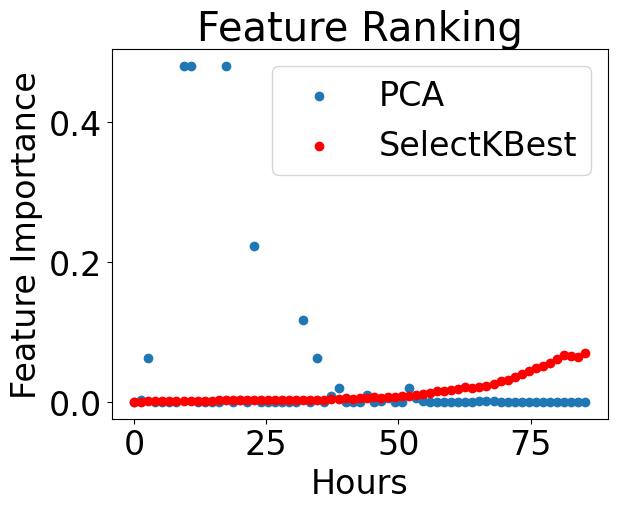

In [11]:
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

x = StandardScaler().fit_transform(ml_quic.get_numpy_dataset('raw'))
y = ml_quic.get_numpy_dataset('labels')

pca = PCA().fit(x)
skb = SelectKBest(k = 'all').fit(x, y)

most_important = [np.abs(pca.components_[i]).argmax() for i in range(pca.components_.shape[0])]
features = pca.explained_variance_ratio_[most_important]

plt.scatter(np.arange(len(features)) * 0.75, features)
plt.scatter(np.arange(len(features)) * 0.75, skb.scores_ / (np.sum(skb.scores_)), c='r')
plt.legend(['PCA', 'SelectKBest'])
plt.title('Feature Ranking')
plt.ylabel('Feature Importance')
plt.xlabel('Hours')